In [1]:
# Step 1: Install Required Libraries (if you trying it out in local n not using google colab etc)
!pip install nltk
!pip install matplotlib seaborn


In [2]:
# Step 2: Import Libraries
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Step 3: Download Resources
nltk.download('punkt_tab')  # For tokenization
nltk.download('stopwords')  # For stopword removal

# To ensure there are no issues with the punkt resource
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    print("punkt resource not found, downloading it now...")
    nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Step 4: Sample Dataset
data = {
    'Text': [
        "I love this product! It's amazing.",
        "Absolutely terrible experience. Do not recommend.",
        "The service was okay, nothing special.",
        "I'm extremely happy with my purchase.",
        "This was a waste of money.",
        "The quality exceeded my expectations!",
        "I will never buy this again.",
        "Pretty decent product overall.",
        "The staff were very helpful and friendly.",
        "Horrible! It broke after one use."
    ],
    'Sentiment': [
        "Positive", "Negative", "Neutral", "Positive", "Negative",
        "Positive", "Negative", "Neutral", "Positive", "Negative"
    ]
}

df = pd.DataFrame(data)

In [14]:
# Step 5: Preprocessing - Ensure the 'punkt' tokenizer works in Colab
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    try:
        words = word_tokenize(text)
    except LookupError:
        print("Error in tokenization. Trying to download punkt resource again.")
        nltk.download('punkt')
        words = word_tokenize(text)  # Retry after downloading
    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words and word.isalnum()]
    return " ".join(filtered_words)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

In [15]:
# Step 6: Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
y = df['Sentiment']


In [16]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Step 8: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Step 9: Evaluate Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


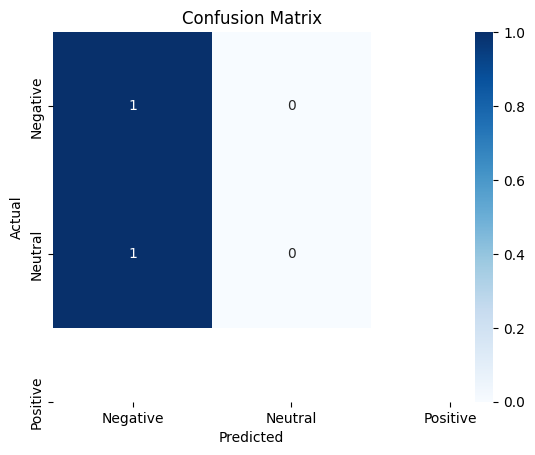

In [19]:
# Step 10: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Step 11: Predict New Sentiments
new_sentences = [
    "This is the best purchase I've ever made!",
    "I hated this product. It was awful.",
    "The experience was average, nothing special.",
    "The review is poor"
]

new_processed = [preprocess_text(sentence) for sentence in new_sentences]
new_features = vectorizer.transform(new_processed)
predictions = model.predict(new_features)

for sentence, sentiment in zip(new_sentences, predictions):
    print(f"Text: {sentence}\nPredicted Sentiment: {sentiment}\n")

Text: This is the best purchase I've ever made!
Predicted Sentiment: Positive

Text: I hated this product. It was awful.
Predicted Sentiment: Positive

Text: The experience was average, nothing special.
Predicted Sentiment: Neutral

Text: The review is poor
Predicted Sentiment: Negative

